# 데이터 읽어오기

In [2]:
import pandas as pd

In [3]:
# 시계열 데이터를 인덱스와 함께 읽는 방법
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
dtype_list = ['datetime64', 'float64', 'int32', 'int32', 'object', 'object', 'int32', 'float64']
dtypes =  dict(zip(features, dtype_list))

df= pd.read_excel('D:/multi/공모전/2020_bigcon/01_train data/2019_실적데이터_v1_200818.xlsx',
                         sheet_name = 'rawdata_2019(완)', header=1, names=features, dtype=dtypes, index_col='broadcast', parse_dates=True) 
#parse_dates=['Date] parsing이 안된 col이 있을 때 쓸수 있다.
df['sales'] = round(df['total_price']/df['unit_price'],0)

print('무형제거 전: ',len(df))

#무형제거
df = df[df.p_group!='무형']
print('무형제거 후: ', len(df))

#product categorical로 바꾸기
df['p_group_code'] = pd.factorize(df.p_group)[0]
print(df['p_group_code'].value_counts())
print(df['p_group'].value_counts())

#date, year, month, day_name,hour 추가
df["date"] = df.index.date
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()
df["Hour"] = df.index.hour


무형제거 전:  38309
무형제거 후:  37372
2     6604
5     6479
0     4340
1     3919
8     3891
3     3884
6     2877
9     2614
4     1305
7      790
10     669
Name: p_group_code, dtype: int64
주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: p_group, dtype: int64


In [4]:
df

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,0,2019-01-01,2019,1,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2,2019-12-31,2019,12,Tuesday,23
2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2,2020-01-01,2020,1,Wednesday,0
2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2,2020-01-01,2020,1,Wednesday,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['font.family'] = 'NanumBarunGothic'# 한글 깨짐

In [7]:
df

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,0,2019-01-01,2019,1,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2,2019-12-31,2019,12,Tuesday,23
2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2,2020-01-01,2020,1,Wednesday,0
2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2,2020-01-01,2020,1,Wednesday,0


# 데이터보기

In [8]:
from datetime import datetime, date, time, timedelta, datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37372 entries, 2019-01-01 06:00:00 to 2020-01-01 00:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exp_min       20588 non-null  float64
 1   m_code        37372 non-null  int32  
 2   p_code        37372 non-null  int32  
 3   p_name        37372 non-null  object 
 4   p_group       37372 non-null  object 
 5   unit_price    37372 non-null  int32  
 6   total_price   35379 non-null  float64
 7   sales         35379 non-null  float64
 8   p_group_code  37372 non-null  int64  
 9   date          37372 non-null  object 
 10  Year          37372 non-null  int64  
 11  Month         37372 non-null  int64  
 12  Weekday Name  37372 non-null  object 
 13  Hour          37372 non-null  int64  
dtypes: float64(3), int32(3), int64(4), object(4)
memory usage: 3.8+ MB


In [10]:
df.head()

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,0,2019-01-01,2019,1,Tuesday,6
2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,0,2019-01-01,2019,1,Tuesday,6


In [11]:
df.tail()

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2,2019-12-31,2019,12,Tuesday,23
2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2,2020-01-01,2020,1,Wednesday,0
2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2,2020-01-01,2020,1,Wednesday,0
2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.0,2,2020-01-01,2020,1,Wednesday,0
2020-01-01 00:00:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,46608000.0,315.0,2,2020-01-01,2020,1,Wednesday,0


In [12]:
df.describe()

,exp_min,m_code,p_code,unit_price,total_price,sales,p_group_code,Year,Month,Hour
count,20588.000000,37372.000000,37372.000000,3.737200e+04,3.537900e+04,35379.000000,37372.000000,37372.000000,37372.000000,37372.000000
mean,20.051913,100389.497726,201211.879081,4.680006e+05,2.310241e+07,314.797366,4.027882,2019.000107,6.463261,14.308493
std,3.116326,251.374951,737.824966,7.314484e+05,2.005790e+07,427.827697,2.888345,0.010345,3.374649,6.620608
min,2.466667,100000.000000,200000.000000,1.280000e+04,1.030000e+05,1.000000,0.000000,2019.000000,1.000000,0.000000
25%,20.000000,100153.000000,200539.000000,5.900000e+04,7.998500e+06,26.000000,2.000000,2019.000000,4.000000,10.000000
50%,20.000000,100346.000000,201160.000000,1.099000e+05,1.732600e+07,130.000000,3.000000,2019.000000,6.000000,15.000000
75%,20.000000,100597.000000,201863.000000,5.090000e+05,3.276300e+07,452.000000,6.000000,2019.000000,9.000000,21.000000
max,40.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08,8070.000000,10.000000,2020.000000,12.000000,23.000000


In [13]:
df.isnull().sum()

exp_min         16784
m_code              0
p_code              0
p_name              0
p_group             0
unit_price          0
total_price      1993
sales            1993
p_group_code        0
date                0
Year                0
Month               0
Weekday Name        0
Hour                0
dtype: int64

In [14]:
print(df.index.min())
print(df.index.max())

2019-01-01 06:00:00
2020-01-01 00:00:00


# am12:00 넘은 데이터 -1 다른 df로 만들기

* origin_df['broadcast'] = origin_df.index - timedelta(days=1)
* am 12:00가 넘은 시간들은 -1days 하기

In [15]:
broadcast=[]
for x in df.index:
    if x.hour>5:
      broadcast.append(x)
    else:
      broadcast.append(x-timedelta(days=1))

# origin_df를 복사하여 change_data로 덮어씌우기
df2 =df.copy()
df2["broadcast"] = broadcast
df2=df2.set_index('broadcast')

#바꾼 데이터들에 대해 update
df2["date"] = df2.index.date
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['Weekday Name'] = df2.index.day_name()
df2["Hour"] = df2.index.hour

df2.tail()

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2,2019-12-31,2019,12,Tuesday,23
2019-12-31 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2,2019-12-31,2019,12,Tuesday,0
2019-12-31 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2,2019-12-31,2019,12,Tuesday,0
2019-12-31 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.0,2,2019-12-31,2019,12,Tuesday,0
2019-12-31 00:00:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,46608000.0,315.0,2,2019-12-31,2019,12,Tuesday,0


# EDA

In [35]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


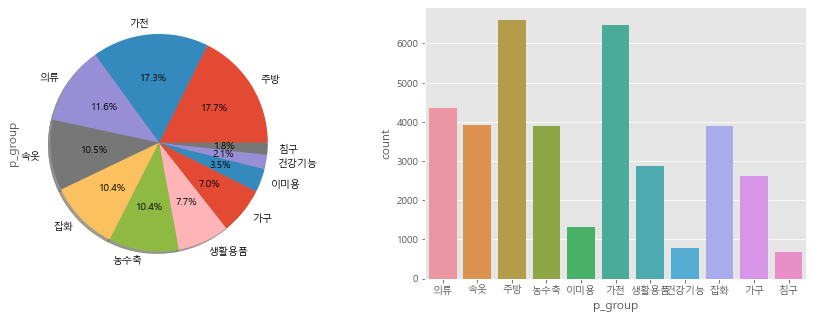

In [36]:
#상품군별로 방송 count

f, ax = plt.subplots(1,2, figsize=(15,5))
df2['p_group'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_xlabel('')
sns.countplot('p_group', data=df2, ax=ax[1])
# plt.legend(loc=1)
plt.show()

# print(change_df['p_group'].value_counts())

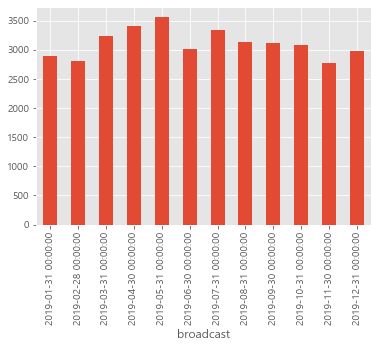

In [37]:
#  모든 상품군 월별 방송 횟수(아마 /3,4)
df2.resample('M').count()['unit_price'].plot(kind='bar')

## 침구

In [20]:
cg_df2=df2[df2.p_group=='침구']

In [21]:
cg_df2.describe()

,exp_min,m_code,p_code,unit_price,total_price,sales,p_group_code,Year,Month,Hour
count,202.000000,669.000000,669.000000,669.000000,6.640000e+02,664.000000,669.0,669.0,669.000000,669.000000
mean,20.364604,100179.802691,200515.201794,78569.506726,1.052947e+07,155.051205,10.0,2019.0,7.170404,11.585949
std,2.339767,130.209814,400.416459,35637.372690,7.461349e+06,120.124447,0.0,0.0,2.090961,5.087308
min,13.000000,100111.000000,200305.000000,39900.000000,4.230000e+05,3.000000,10.0,2019.0,4.000000,0.000000
25%,20.000000,100139.000000,200373.000000,59900.000000,4.884250e+06,67.000000,10.0,2019.0,6.000000,11.000000
50%,20.000000,100139.000000,200390.000000,69900.000000,9.016500e+06,130.000000,10.0,2019.0,7.000000,12.000000
75%,20.000000,100144.000000,200398.000000,79900.000000,1.441700e+07,224.000000,10.0,2019.0,9.000000,14.000000
max,30.000000,100813.000000,202400.000000,239000.000000,5.810200e+07,1141.000000,10.0,2019.0,11.000000,23.000000


Text(0.5, 1.0, 'monthly broadcast count')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


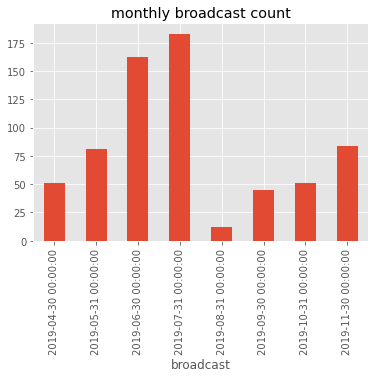

In [22]:
# 월별로 방송 count

monthly_count = cg_df2.resample('M')['unit_price'].count().plot(kind='bar')
plt.title('monthly broadcast count')

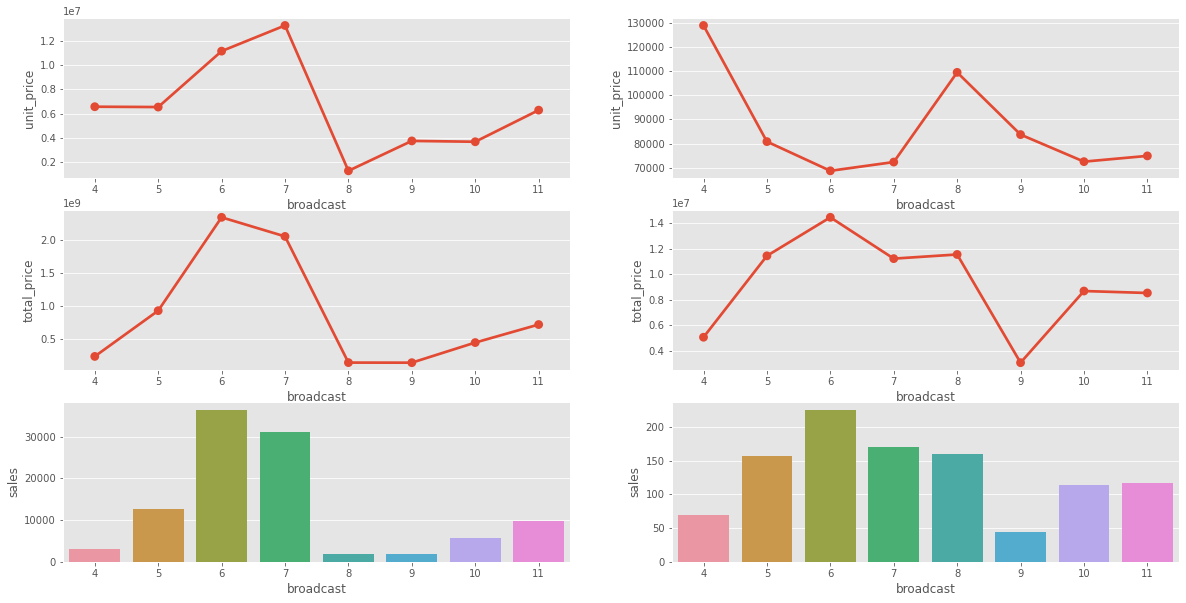

In [23]:
monthly_sum =cg_df2.resample('M')['unit_price','total_price','sales'].sum()
# print(monthly_sum)

monthly_mean =cg_df2.resample('M')['unit_price','total_price','sales'].mean()
# print(monthly_mean)

figure, ((ax1,ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(20,10)

sns.pointplot(monthly_sum.index.month, monthly_sum.unit_price, ax=ax1)
sns.pointplot(monthly_sum.index.month, monthly_sum.total_price, ax=ax3)
sns.barplot(monthly_sum.index.month, monthly_sum.sales, ax=ax5)

sns.pointplot(monthly_mean.index.month, monthly_mean.unit_price, ax=ax2)
sns.pointplot(monthly_mean.index.month, monthly_mean.total_price, ax=ax4)
sns.barplot(monthly_mean.index.month, monthly_mean.sales, ax=ax6)

# ax1.set(ylabel='count',title='월별 방송시청시간')
# ax4.set(xlabel='count',title='totla_price__sum',xlabel='')
# ax5.set(xlabel='quarter', title='sales__sum',xlabel='')
# ax6.set(xlabel='quarter', title='unit_price__mean',xlabel='')
# ax7.set(xlabel='quarter', title='totla_price__mean',xlabel='')
# ax8.set(xlabel='quarter', title='sales__mean',xlabel='')

* sales와 total_price는 당연히 비례한다.
* sum과 mean이 차이가 난다는것은 월별 판매갯수, 판매품목 등등에 따라 차이가 난다고 생각했다.

In [24]:
cg_df2

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-04-18 12:00:00,20.0,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6400000.0,107.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:00:00,NaN,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,6334000.0,91.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:00:00,NaN,100140,200375,보몽드 순면60수 피그먼트워싱 침구세트 K,침구,79900,7421000.0,93.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:20:00,20.0,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6825000.0,114.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:20:00,NaN,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,7182000.0,103.0,10,2019-04-18,2019,4,Thursday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-24 12:40:00,NaN,100143,200397,보몽드 카밀라 더블착번극세사 토퍼침구세트 SS(슈퍼싱글),침구,59900,8419000.0,141.0,10,2019-11-24,2019,11,Sunday,12
2019-11-24 13:00:00,20.0,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,89900,10592000.0,118.0,10,2019-11-24,2019,11,Sunday,13
2019-11-24 13:00:00,NaN,100143,200394,보몽드 카밀라 더블착번극세사 토퍼침구세트 K(킹),침구,79900,10946000.0,137.0,10,2019-11-24,2019,11,Sunday,13


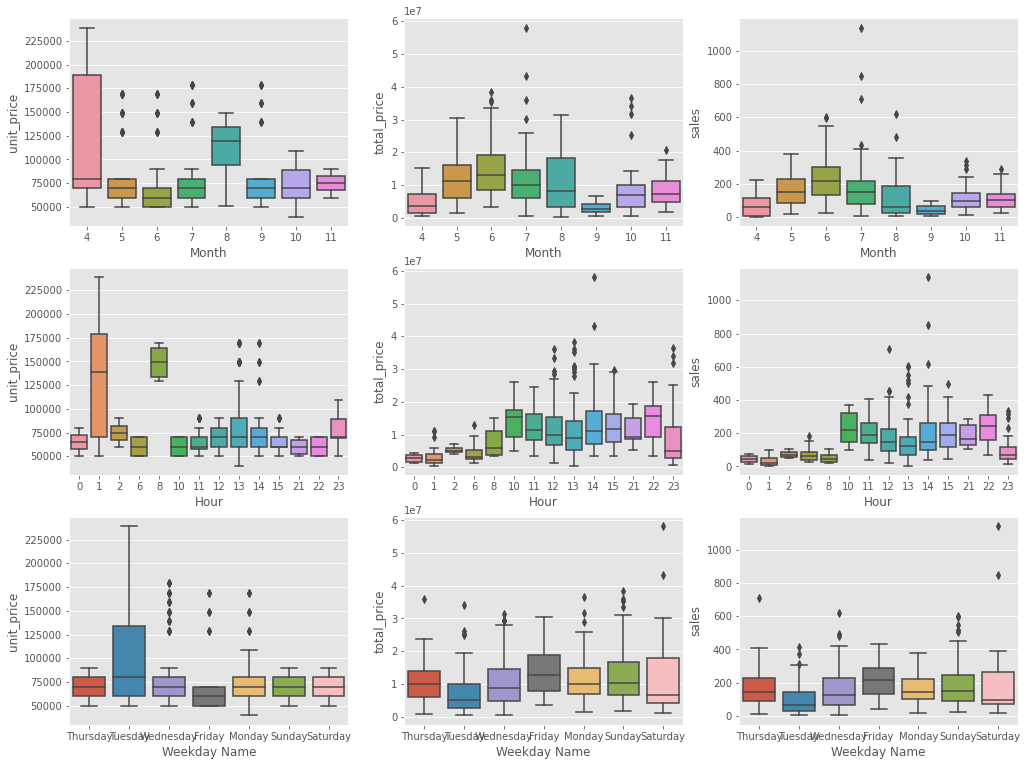

In [25]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6), (ax7,ax8,ax9))= plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(17,13)

sns.boxplot(data=cg_df2, x='Month', y='unit_price', ax=ax1)
sns.boxplot(data=cg_df2, x='Month', y='total_price', ax=ax2)
sns.boxplot(data=cg_df2, x='Month', y='sales', ax=ax3)

sns.boxplot(data=cg_df2, x='Hour', y='unit_price', ax=ax4)
sns.boxplot(data=cg_df2, x='Hour', y='total_price', ax=ax5)
sns.boxplot(data=cg_df2, x='Hour', y='sales', ax=ax6)

sns.boxplot(data=cg_df2, x='Weekday Name', y='unit_price', ax=ax7)
sns.boxplot(data=cg_df2, x='Weekday Name', y='total_price', ax=ax8)
sns.boxplot(data=cg_df2, x='Weekday Name', y='sales', ax=ax9)

> unit_price 
* 4월에는 가격이 다양한 제품을 팔았겠네? (방송 노출된 양은 저렴한 가격보다 비싼가격대 물건이 많겠다.)
* 8월에는 제법 비싼 제품을 팔았다.
* 10월에 다른 날 보다 싸게 판 물건이 있는것으로 보아 새로운 가격대의 물건을 팔기 시작했거나, 특가/세일 상품 팔았다고 추정
* 침구류는 가격대 편차가 심하지 않는것으로 추정
* 25시에 가격대가 다양한 상품을 방송했고,
* 8시에는 비싼 물건을 팔았다. 주부를 타겟팅한걸까? 누구를 타겟팅한거지?
* 13시에 다양한 가격대와 조금 저렴한 상품을 팔았고, 저것은 10월달 13시 이겠다.
* 22시는 주로 같은 가격대의 물건을 팔았을 것 같다. 혹은 같은 상품


> total_price & sales
* 6월달에 판매량이 가장 높겠고, 9월달이 가장 저조
* 8시에 unit_price가 높은데 sales는 낮음/ 비싸서 안샀나? 
* 화<수<<<목,일 비슷 <금 / 토요일은 생각보다 많이 안샀따?

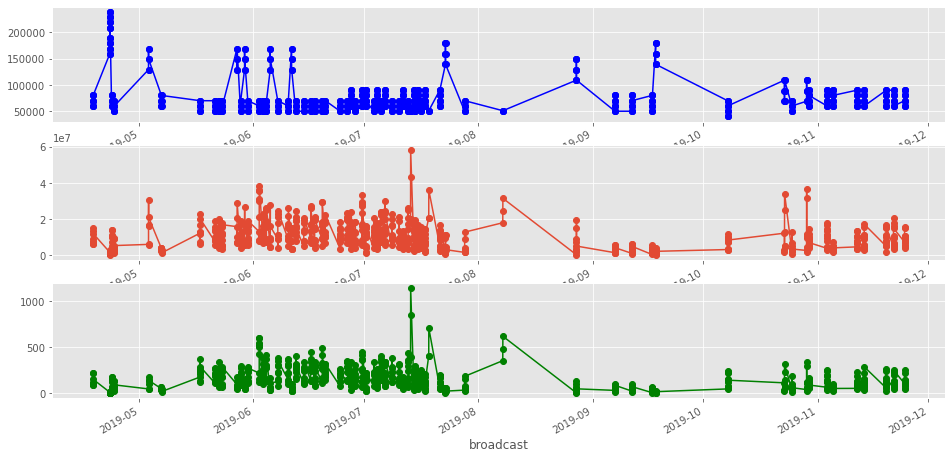

In [26]:
figure,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure_set_size_inches=(16,8)

cg_df2.loc['2019','unit_price'].plot(marker='o', linestyle='-',figsize=(16,8), ax=ax1, color='blue')
cg_df2.loc['2019','total_price'].plot(marker='o', linestyle='-',figsize=(16,8), ax=ax2)
cg_df2.loc['2019','sales'].plot(marker='o', linestyle='-',figsize=(16,8),ax=ax3, color='green')

In [27]:
cg_df2['p_name'].value_counts()

보몽드 샐비어 시어서커 리플 침구세트 Q             84
보몽드 샐비어 시어서커 리플 침구세트 SS            84
보몽드 샐비어 시어서커 리플 침구세트 K             84
보몽드 엘사 자수 쿨 시어서커 침구세트 K            30
보몽드 엘사 자수 쿨 시어서커 침구세트 SK(슈퍼킹)      30
보몽드 엘사 자수 쿨 시어서커 침구세트 SS           30
보몽드 엘사 자수 쿨 시어서커 침구세트 Q            30
보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹)     15
보몽드 카밀라 더블착번극세사 토퍼침구세트 Q(퀸)        15
보몽드 카밀라 더블착번극세사 토퍼침구세트 SS(슈퍼싱글)    15
보몽드 카밀라 더블착번극세사 토퍼침구세트 K(킹)        15
효재 자수 광목 워싱 침구세트 퀸                 10
효재 자수 광목 워싱 침구세트 슈퍼싱글              10
효재 자수 광목 워싱 침구세트 킹                 10
보몽드 헤르만 착번아웃 극세사 침구세트 Q(퀸)          9
보몽드 헤르만 착번아웃 극세사 침구세트 SS(슈퍼싱글)      9
보몽드 헤르만 착번아웃 극세사 침구세트 K(킹)          9
보몽드 순면60수 피그먼트워싱 침구세트 SS            9
안지 청풍 대자리                           9
보몽드 순면60수 피그먼트워싱 침구세트 K             9
보몽드 헤르만 착번아웃 극세사 침구세트 SK(슈퍼킹)       9
보몽드 순면60수 피그먼트워싱 침구세트 Q             9
한빛 페르시안스타일 셔닐 카페트 특대형               6
한빛 페르시안스타일 셔닐 카페트 대형                6
보몽드 클라라 소프트플란넬 침구세트 SS(슈퍼싱글)        6
보몽드 클라라 소프트플란넬 침구세트 Q(퀸)            6
보몽드 엘리 소프트플란

In [ ]:
re.compile('((20\d\d-[01]\d-[0123]\d) +([^\d.]+)(?<! )[^\n]+)')

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [81]:
cg_df2

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,p_group_code,date,Year,Month,Weekday Name,Hour
broadcast,,,,,,,,,,,,,,
2019-04-18 12:00:00,20.0,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6400000.0,107.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:00:00,NaN,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,6334000.0,91.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:00:00,NaN,100140,200375,보몽드 순면60수 피그먼트워싱 침구세트 K,침구,79900,7421000.0,93.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:20:00,20.0,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6825000.0,114.0,10,2019-04-18,2019,4,Thursday,12
2019-04-18 12:20:00,NaN,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,7182000.0,103.0,10,2019-04-18,2019,4,Thursday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-24 12:40:00,NaN,100143,200397,보몽드 카밀라 더블착번극세사 토퍼침구세트 SS(슈퍼싱글),침구,59900,8419000.0,141.0,10,2019-11-24,2019,11,Sunday,12
2019-11-24 13:00:00,20.0,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,89900,10592000.0,118.0,10,2019-11-24,2019,11,Sunday,13
2019-11-24 13:00:00,NaN,100143,200394,보몽드 카밀라 더블착번극세사 토퍼침구세트 K(킹),침구,79900,10946000.0,137.0,10,2019-11-24,2019,11,Sunday,13


In [ ]:
if cg_df2[m_code]
cg_df2['group'] = 